# Tutorial: Supervised Learning Problem and Least Squares

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F02_tutorial_supervised_learning_problem_ols.ipynb)

Tutorial to the classes [Supervised Learning Problem and Least Squares](02_supervised_learning_problem.ipynb) and [Ordinary Least Squares](03_ordinary_least_squares.ipynb).

<div class="alert alert-block alert-info">
    <b>Tutorial Objectives</b>
    
- Read, plot and analyze train data
- Use supervised learning to predict the regional electricity consumption of France in response electric heating based on temperature data
- Test the linear least squares (OLS) model
- Evaluate their performance by estimating their Expected Prediction Errors (EPE) using test data
</div>

## Dataset presentation

- Input:
  - 2m-temperature
    - Domain: Metropolitan France
    - Spatial resolution: regional average
    - Time resolution: hourly
    - Period: 2014-2021
    - Units: °C
    - Source: [MERRA-2 reanalysis](https://gmao.gsfc.nasa.gov/reanalysis/MERRA-2/)
- Target:
  - Electricity demand
    - Domain: Metropolitan France
    - Spatial resolution: regional sum
    - Time resolution: hourly
    - Period: 2014-2021
    - Units: MWh
    - Source: [RTE](https://opendata.reseaux-energies.fr/)

## Reading and pre-analysis of the input and output data

### Import data-analysis and plot modules and define paths

In [55]:
# Path manipulation module
from pathlib import Path
# Numerical analysis module
import numpy as np
# Formatted numerical analysis module
import pandas as pd
# Plot module
import matplotlib.pyplot as plt
# Default colors
RC_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']
# Matplotlib configuration
plt.rc('font', size=14)

In [56]:
# Set data directory
data_dir = Path('data')

# Set keyword arguments for pd.read_csv
kwargs_read_csv = dict()

# Set first and last years
FIRST_YEAR = 2014
LAST_YEAR = 2021

# Define temperature filepath
temp_filename = 'surface_temperature_merra2_{}-{}.csv'.format(
    FIRST_YEAR, LAST_YEAR)
temp_filepath = Path(data_dir, temp_filename)
temp_label = 'Temperature (°C)'

# Define electricity demand filepath
dem_filename = 'reseaux_energies_demand_demand.csv'
dem_filepath = Path(data_dir, dem_filename)
dem_label = 'Electricity consumption (MWh)'

### Reading and plotting the raw temperature data

> ***Question (code cells below)***
> - Use `pd.read_csv` with the filepath and appropriate options to make sure to get the column names and the index as dates (`DatetimeIndex`).
> - Use the `resample` method from the data frame to compute daily means.
> - Plot the `'Île-de-France'` daily-mean temperature time series for (a) the whole period, (b) one year, (c) one month in winter and (d) one month in summer on 4 different figures (use `plt.figure`) using `plt.plot` or the `plot` method from data frames (preferably).
> - Use the `mean` and `var` methods to get mean and variance of the daily-mean temperature.

In [57]:
df_data = pd.read_csv('data/surface_temperature_merra2_2014-2021.csv')
df_data = df_data.set_index('time')


In [58]:
df_data.index = pd.to_datetime(df_data.index)
df_data

,Grand Est,Nouvelle-Aquitaine,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,Bretagne,Centre-Val de Loire,Île-de-France,Occitanie,Hauts-de-France,Normandie,Pays de la Loire,Provence-Alpes-Côte d'Azur
time,,,,,,,,,,,,
2014-01-01 00:00:00+00:00,2.831726,7.069458,2.800629,3.720520,8.367065,5.591950,5.584137,6.643921,4.568512,3.880218,7.083618,3.379333
2014-01-01 01:00:00+00:00,2.981445,6.853302,2.692261,3.743195,8.393005,5.230896,5.503662,6.519012,4.261169,3.794159,7.153290,3.383453
2014-01-01 02:00:00+00:00,3.114227,6.616943,2.624237,3.735352,8.307800,4.896515,5.422058,6.415436,4.033905,3.808685,7.303253,3.354370
2014-01-01 03:00:00+00:00,3.375610,6.341644,2.648132,3.794952,8.361298,4.676727,5.059296,6.243591,3.912689,3.805939,7.490418,3.326660
2014-01-01 04:00:00+00:00,3.649963,6.107422,2.684998,3.780426,8.510193,4.642578,4.453552,6.014252,3.946747,3.948578,7.695252,3.321167
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00+00:00,7.807495,12.928131,11.565155,8.865143,10.963287,9.856415,8.670929,14.322235,10.838532,10.558807,10.744568,12.052460
2021-12-31 20:00:00+00:00,7.468536,12.794006,11.512268,8.735230,10.505463,9.880188,8.278137,14.525848,10.453918,10.188812,10.200073,12.098511
2021-12-31 21:00:00+00:00,7.163940,12.623016,11.504456,8.647827,10.144775,9.919037,7.946655,14.788910,10.137085,9.901337,9.768585,12.247986


In [59]:
df_data_daily = df_data.resample('3D').mean()
df_train = df_data_daily['2014':'2014'][['Île-de-France']]

In [60]:
df_train

,Île-de-France
time,
2014-01-01 00:00:00+00:00,7.936704
2014-01-04 00:00:00+00:00,7.241870
2014-01-07 00:00:00+00:00,8.681527
2014-01-10 00:00:00+00:00,4.165215
2014-01-13 00:00:00+00:00,4.593889
...,...
2014-12-18 00:00:00+00:00,8.625959
2014-12-21 00:00:00+00:00,5.814691
2014-12-24 00:00:00+00:00,4.375529


<AxesSubplot:xlabel='time'>

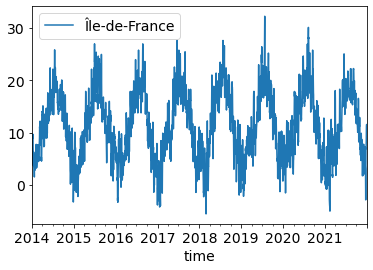

In [61]:
# answer cell
df_temp = pd.read_csv(temp_filepath, index_col=['time'])
df_temp.index = pd.to_datetime(df_temp.index)
df_temp_idf = df_temp[['Île-de-France']].resample('D').mean()
df_temp_idf.plot()

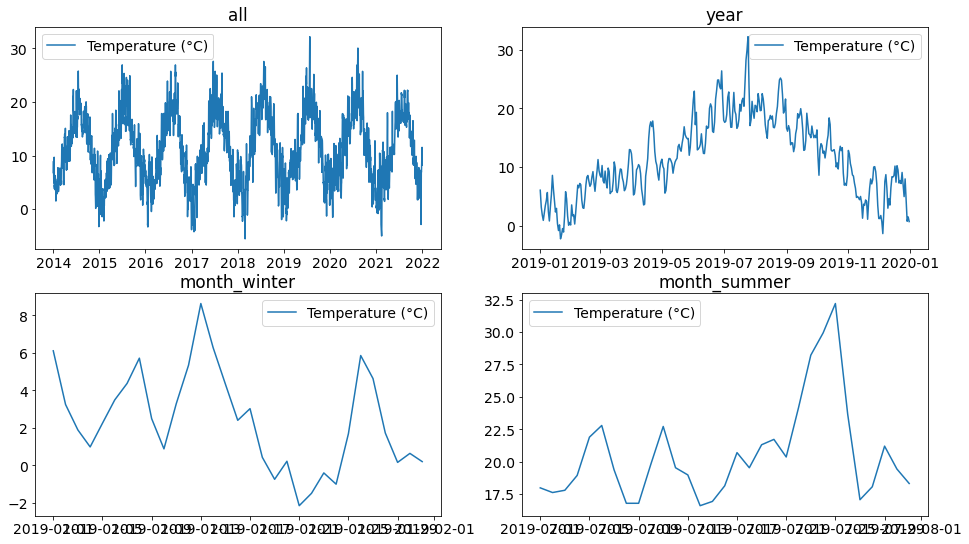

In [62]:
periods = {'all':['2014-01-01','2021-12-31'],
           'year':['2019-01-01','2019-12-31'],
           'month_winter':['2019-01-01','2019-01-31'],
           'month_summer':['2019-07-01','2019-07-31']
          }
# fig properties
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (16,9))
for i,p in enumerate(periods):
    ax[int(i/2),i%2].plot(df_temp_idf[periods[p][0]:periods[p][1]], label=temp_label)
    ax[int(i/2),i%2].legend()
    ax[int(i/2),i%2].set_title(p)


### Reading and plotting the demand data

> ***Question***
> - Same question for the demand but with daily sums instead of daily means

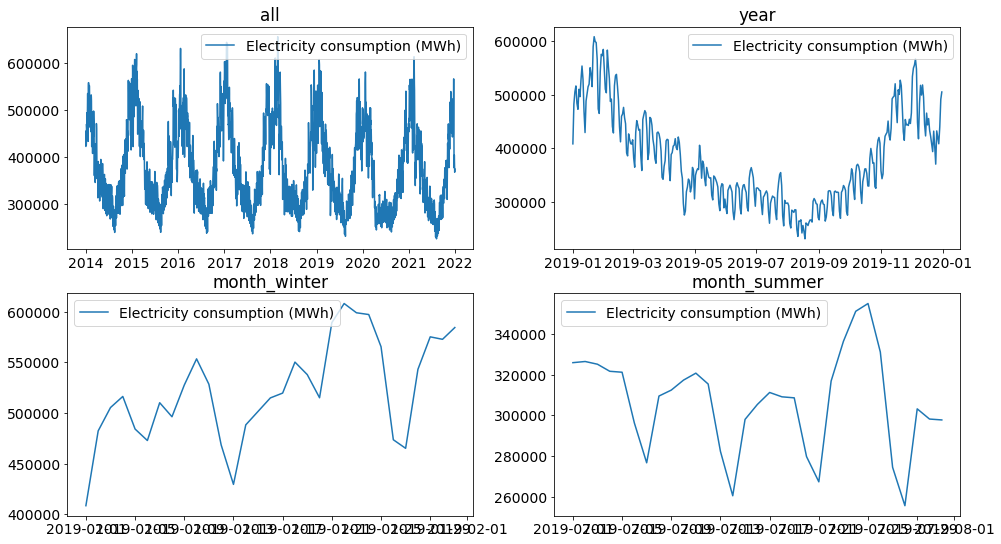

In [63]:
# answer cell
df_dem = pd.read_csv(dem_filepath, index_col=['time'])
df_dem.index = pd.to_datetime(df_dem.index)
df_dem_idf = df_dem[['Île-de-France']].resample('D').sum()

# fig properties
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (16,9))
for i,p in enumerate(periods):
    ax[int(i/2),i%2].plot(df_dem_idf[periods[p][0]:periods[p][1]], label=dem_label)
    ax[int(i/2),i%2].legend()
    ax[int(i/2),i%2].set_title(p)


### Analyzing the input and target data and their relationships

> ***Question (write your answer in text box below)***
> - Describe the seasonality of the temperature in Île-de-France.
> - Are all years the same?
> - Describe the seasonal and weakly demand patterns.

Answer:

> ***Question***
> - Select the temperature and demand data for their largest common period using the `intersection` method of the `index` attribute of the data frames.
> - Represent a scatter plot of the daily demand versus the daily temperature using `plt.scatter`.

Text(0, 0.5, 'Electricity consumption (MWh)')

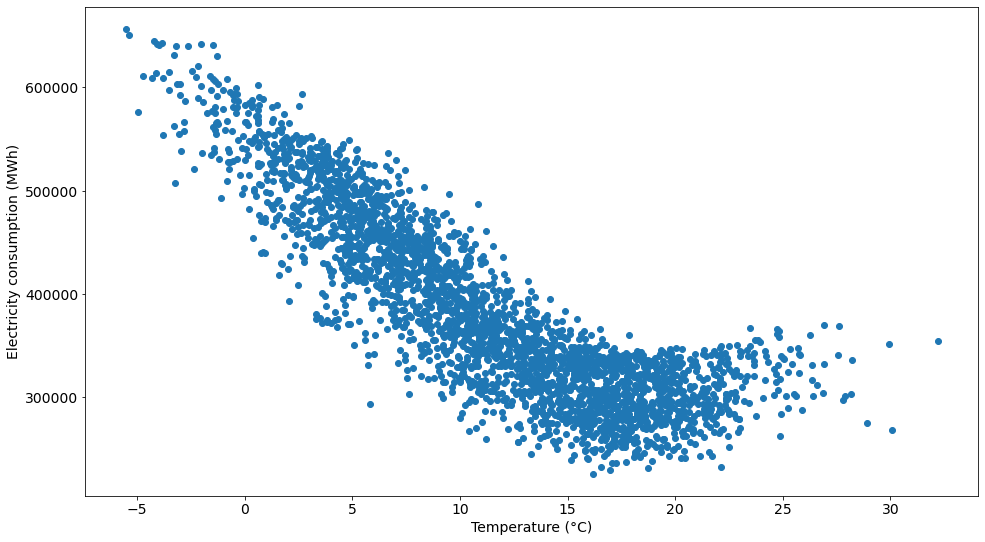

In [64]:
# answer cell
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (16,9))
ax.scatter(df_temp_idf,df_dem_idf)
ax.set_xlabel(temp_label)
ax.set_ylabel(dem_label)

> ***Question***
> - Compute the correlation between the daily temperature and the daily demand in Île-de-France using `np.corrcoef`.
> - Compute the correlation between the monthly temperature and the monthly demand using the `resample` method.
> - What do you think explains the difference between the daily and the monthly correlation?

In [65]:
# answer cell
# Daily
corr_daily = np.corrcoef(np.squeeze(df_temp_idf.values),np.squeeze(df_dem_idf.values))
print('Daily: ',corr_daily)

corr_monthly = np.corrcoef(np.squeeze(df_temp_idf.resample('M').mean().values),np.squeeze(df_dem_idf.resample('M').sum().values))
print('Monthly: ',corr_monthly)

Daily:  [[ 1.        -0.8601297]
 [-0.8601297  1.       ]]
Monthly:  [[ 1.         -0.94011428]
 [-0.94011428  1.        ]]


Answer:

Text(0, 0.5, 'Electricity consumption (MWh)')

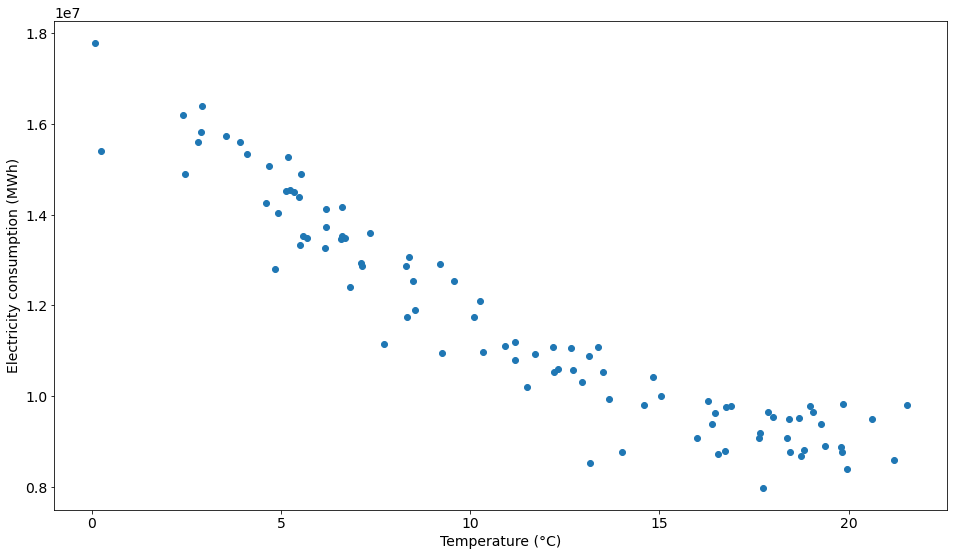

In [66]:
# answer cell
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (16,9))
ax.scatter(df_temp_idf.resample('M').mean(),df_dem_idf.resample('M').sum())
ax.set_xlabel(temp_label)
ax.set_ylabel(dem_label)

## Ordinary Least Squares

> ***Question***
> - Perform an OLS with intercept using the entire dataset from the temperature using the formula for the optimal coefficients derived in [Supervised Learning Problem and Least Squares](2_supervised_learning_problem_ols.ipynb) (without Scikit-Learn). To do so:
>   - Prepare the input matrix and output vector with the `np.concatenate` function (for instance);
>   - Use the matrix-multiplication operator seen in [Introduction](1_introduction.ipynb) and the `np.linalg.inv` function to compute the optimal coefficients and print them.
> - Use the estimated coefficents to predict the target from the input train data.
> - Overlay your prediction to the scatter plot of the train data.
> - Compute the train Mean Squared Error (MSE) and the train coefficient of determination ($R^2$) and print them.

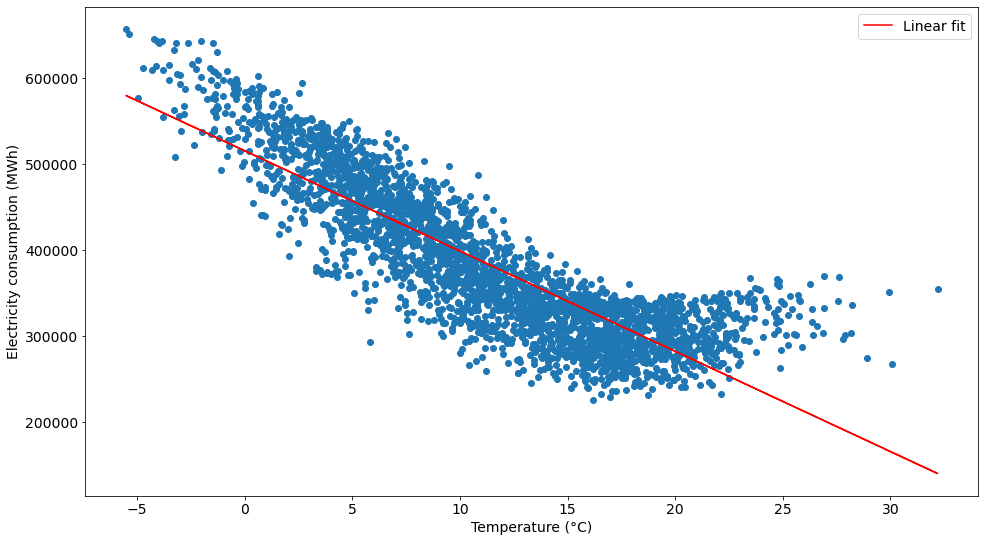

In [67]:
# prepare dataset: limit height to h_max and drop missing values

X = np.squeeze(df_temp_idf.values)
y = np.squeeze(df_dem_idf.values)

# create feature matrix
A = np.vstack([X, np.ones(len(X))]).T
#linear regression with numpy
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# plot original dataset and linear fit

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (16,9))
ax.scatter(df_temp_idf,df_dem_idf)
ax.set_xlabel(temp_label)
ax.set_ylabel(dem_label)

ax.plot(X, m*X + c, 'r', label='Linear fit')
plt.legend()

> ***Question***
> - Compute the optimal coefficients using centered input temperatures.
> - Compute the optimal intercept alone using a single-column input matrix.
> - Compare the resulting two estimations of the intercept with the sample mean of the target train data.

In [68]:
# answer cell


> ***Question***
> - Perform an OLS fit with intercept using the entire dataset to predict the demand from the temperature using Scikit-learn. To do so:
>   - Import the `linear_model` module from `sklearn` (Scikit-Learn)
>   - Define a regressor using `linear_model.LinearRegression` (by default, the regressor is configured to fit an intercept in addition to the features, see `fit_intercept` option)
>   - Prepare the input matrix and output vector for the `fit` method of the regressor
>   - Apply the `fit` method to the input and output
> - Print the fitted coefficients using the `coef_` attribute of the regressor.
> - Compute the train $R^2$ coefficient using the `score` method of the regressor.
> - Compare the resulting coefficients and score to those obtained above by applying the formulas yourself.

In [69]:
# answer cell
from sklearn.linear_model import LinearRegression

In [70]:
X = df_temp_idf.values
y = df_dem_idf.values
reg = LinearRegression().fit(X,y)
print('OLS sklearn m:',reg.coef_)
print('OLS sklearn c:',reg.intercept_)
print('OLS sklearn score:',reg.score(X,y))

print('OLS formulas m:',m)
print('OLS formulas c:',c)

OLS sklearn m: [[-11638.0217295]]
OLS sklearn c: [515062.29649111]
OLS sklearn score: 0.7398231038308329
OLS formulas m: -11638.021729499458
OLS formulas c: 515062.2964911108


> ***Question***
> - Define and array of 100 temperatures ranging from -5 to 35°C with `np.linspace`.
> - Make a prediction of the demand for these temperatures using the trained OLS model with the `predict` method of the regressor.
> - Plot this prediction over the scatter plot of the train data.
> - Does the demand prediction seem satisfactory over the whole range of temperatures?

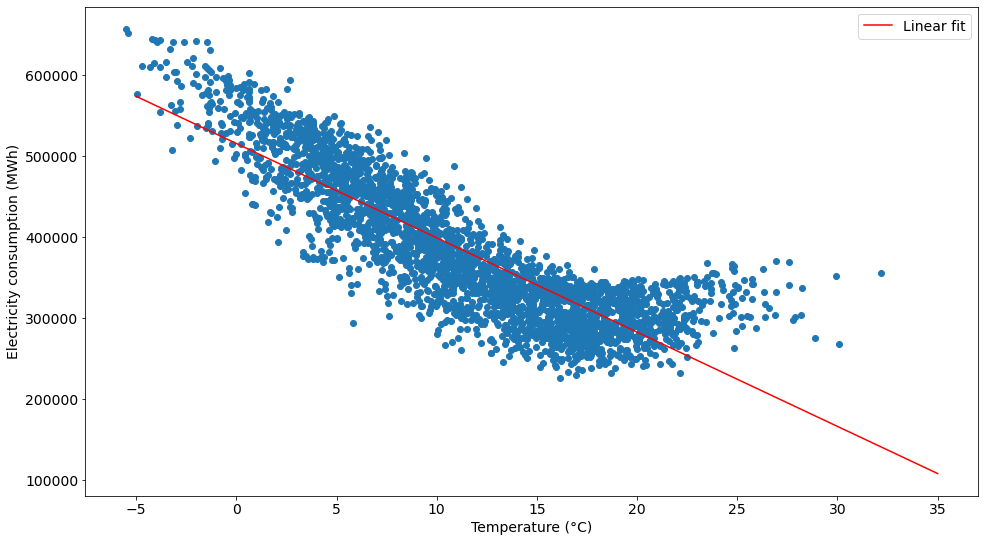

In [71]:
# answer cell
y_p = reg.predict(np.linspace(-5,35,100).reshape(100,1))

# plot original dataset and linear fit

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (16,9))
ax.scatter(df_temp_idf,df_dem_idf)
ax.set_xlabel(temp_label)
ax.set_ylabel(dem_label)

ax.plot(np.linspace(-5,35,100), y_p, 'r', label='Linear fit')
plt.legend()

<AxesSubplot:>

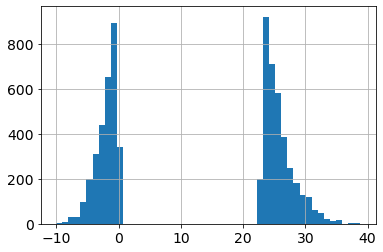

In [92]:
df_data['Île-de-France'].loc[(df_data['Île-de-France']>23)|(df_data['Île-de-France']<0)].hist(bins=50)

Answer: Answer the theoretical concept question 

In [93]:
# answer cell
from sklearn.tree import DecisionTreeRegressor

In [98]:
X = df_temp_idf.values
y = df_dem_idf.values
reg = DecisionTreeRegressor().fit(X,y)
#print('OLS sklearn m:',reg.coef_)
#print('OLS sklearn c:',reg.intercept_)
print('OLS sklearn score:',reg.score(X,y))

print('OLS formulas m:',m)
print('OLS formulas c:',c)

OLS sklearn score: 0.9999844587045138
OLS formulas m: -11638.021729499458
OLS formulas c: 515062.2964911108


> ***Question***
> - Define and array of 100 temperatures ranging from -5 to 35°C with `np.linspace`.
> - Make a prediction of the demand for these temperatures using the trained OLS model with the `predict` method of the regressor.
> - Plot this prediction over the scatter plot of the train data.
> - Does the demand prediction seem satisfactory over the whole range of temperatures?

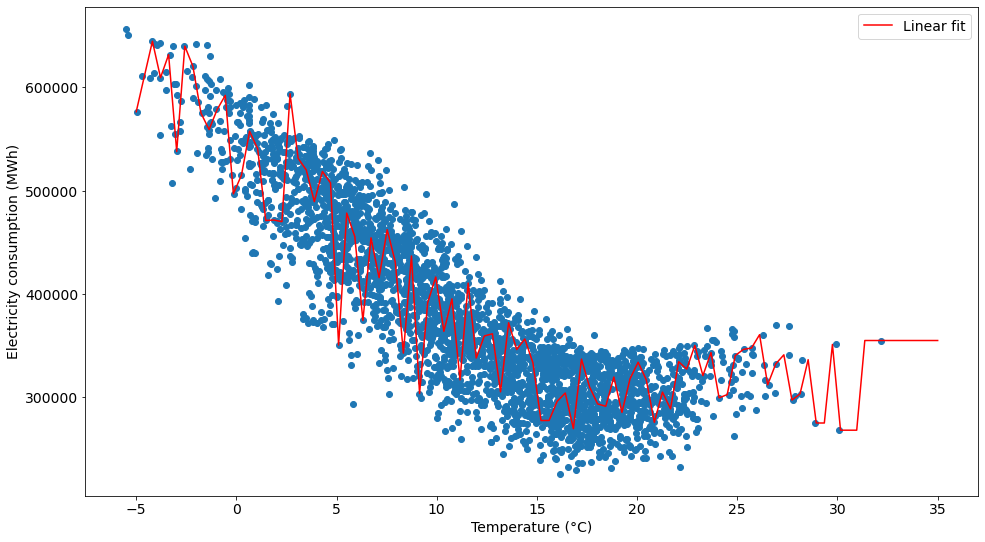

In [97]:
# answer cell
y_p = reg.predict(np.linspace(-5,35,100).reshape(100,1))

# plot original dataset and linear fit

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (16,9))
ax.scatter(df_temp_idf,df_dem_idf)
ax.set_xlabel(temp_label)
ax.set_ylabel(dem_label)

ax.plot(np.linspace(-5,35,100), y_p, 'r', label='Linear fit')
plt.legend()

In [100]:
X

TypeError: 'tuple' object is not callable

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.
Several slides and images are taken from the very good [Scikit-learn course](https://inria.github.io/scikit-learn-mooc/).

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>